In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob 
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from camera import Camera
from threshold import Threshold
from perspective import Perspective 
from line import Line
%matplotlib inline

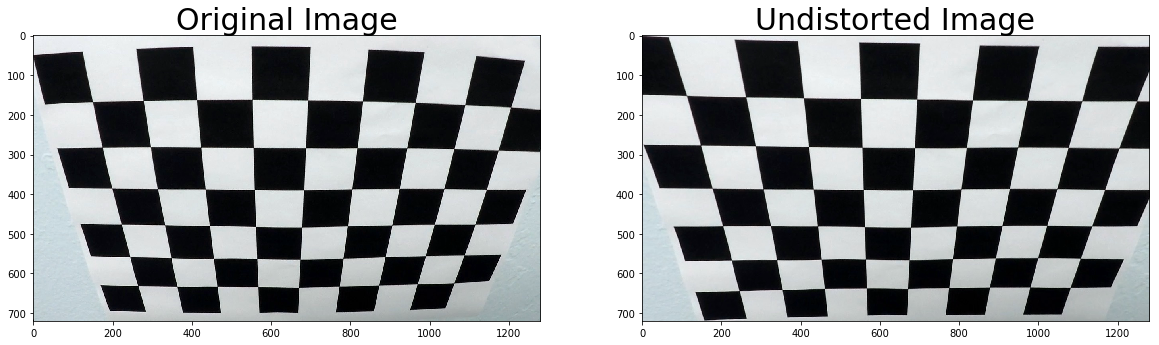

In [2]:
camera = Camera()
camera.calibirateCamera()
camera.display(True)

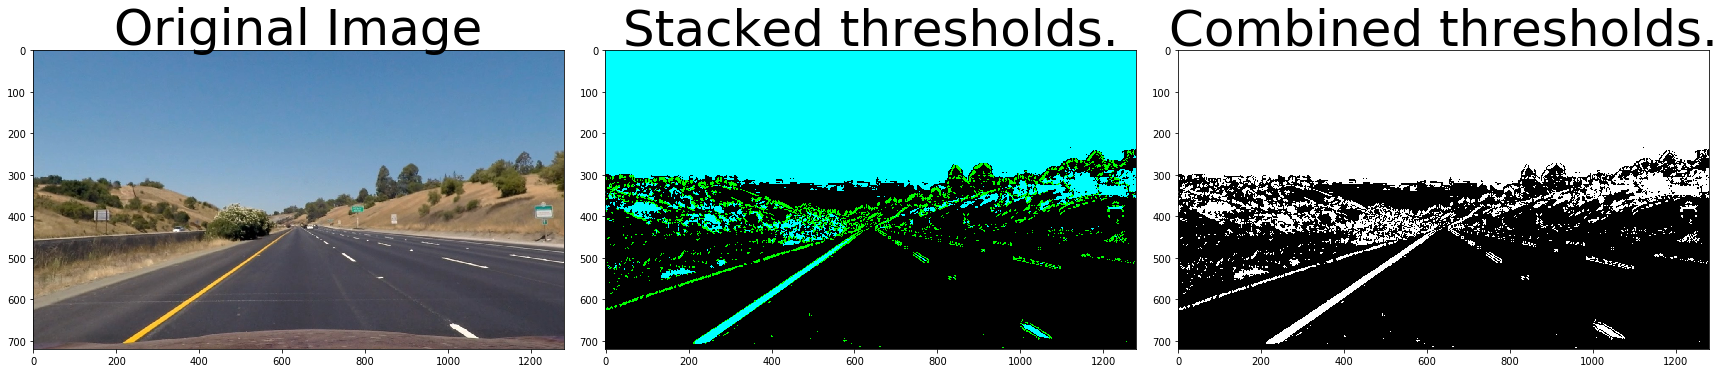

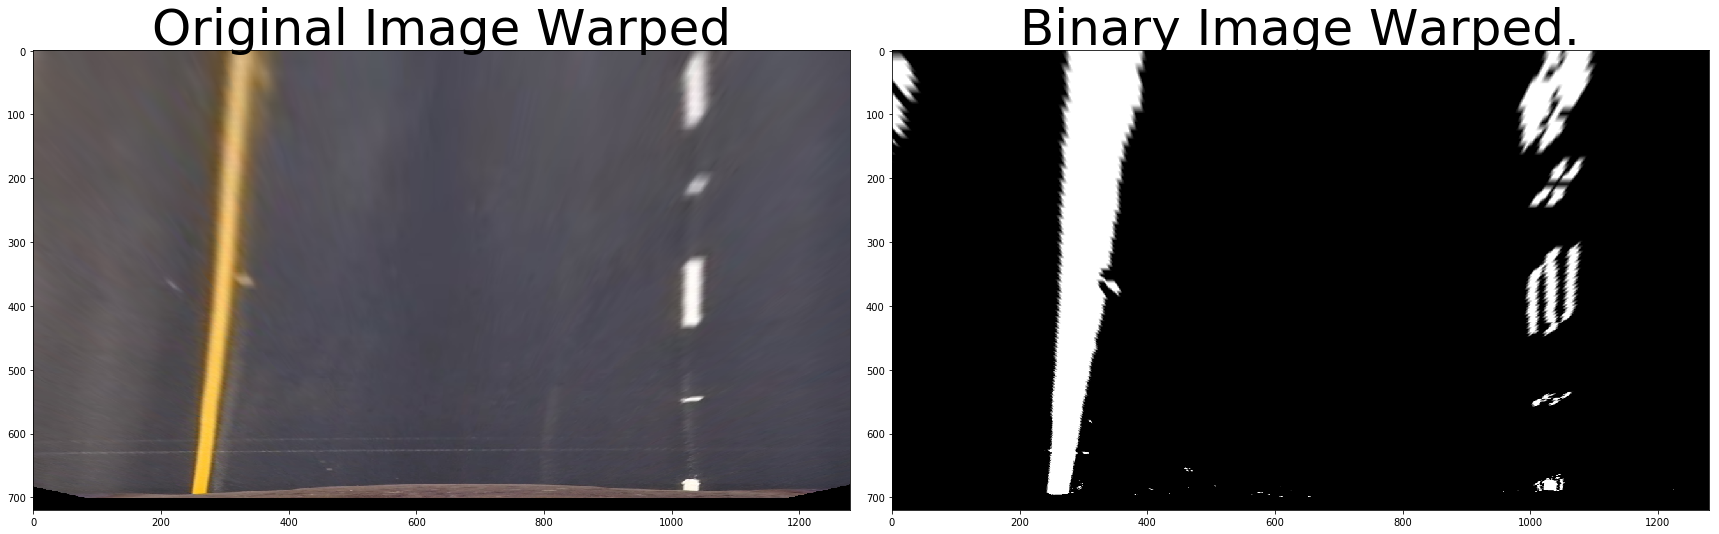

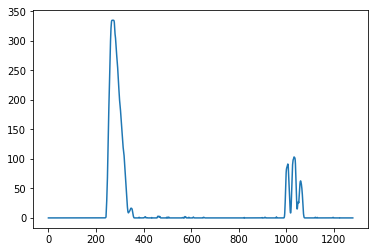

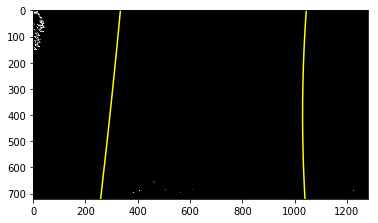

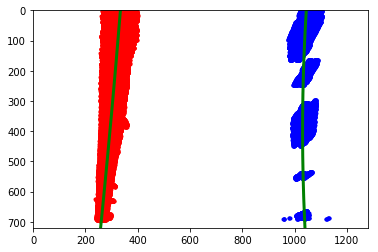

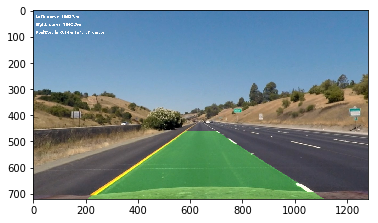

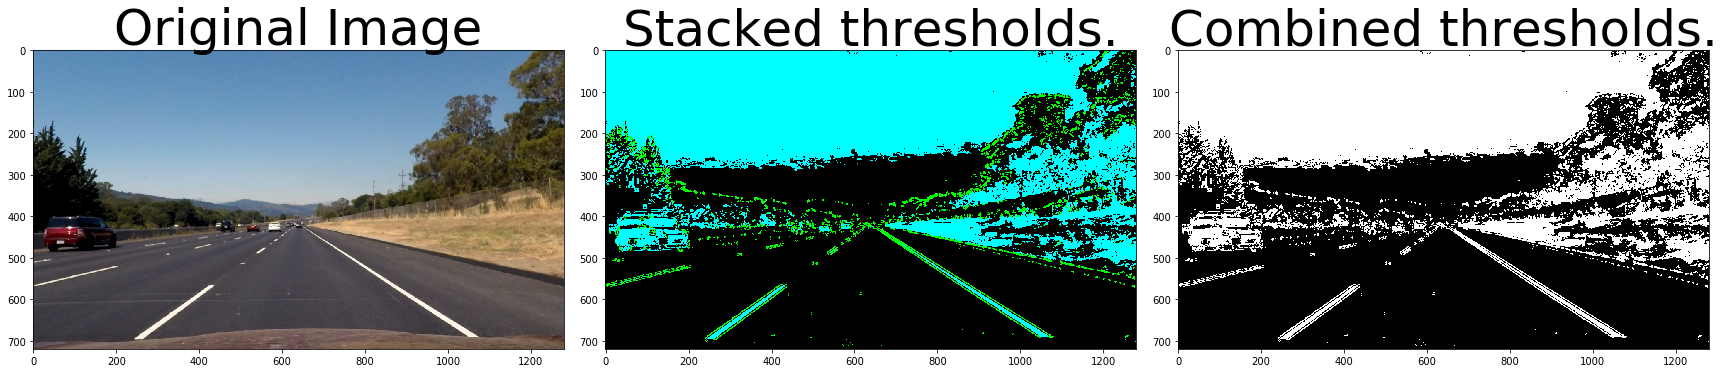

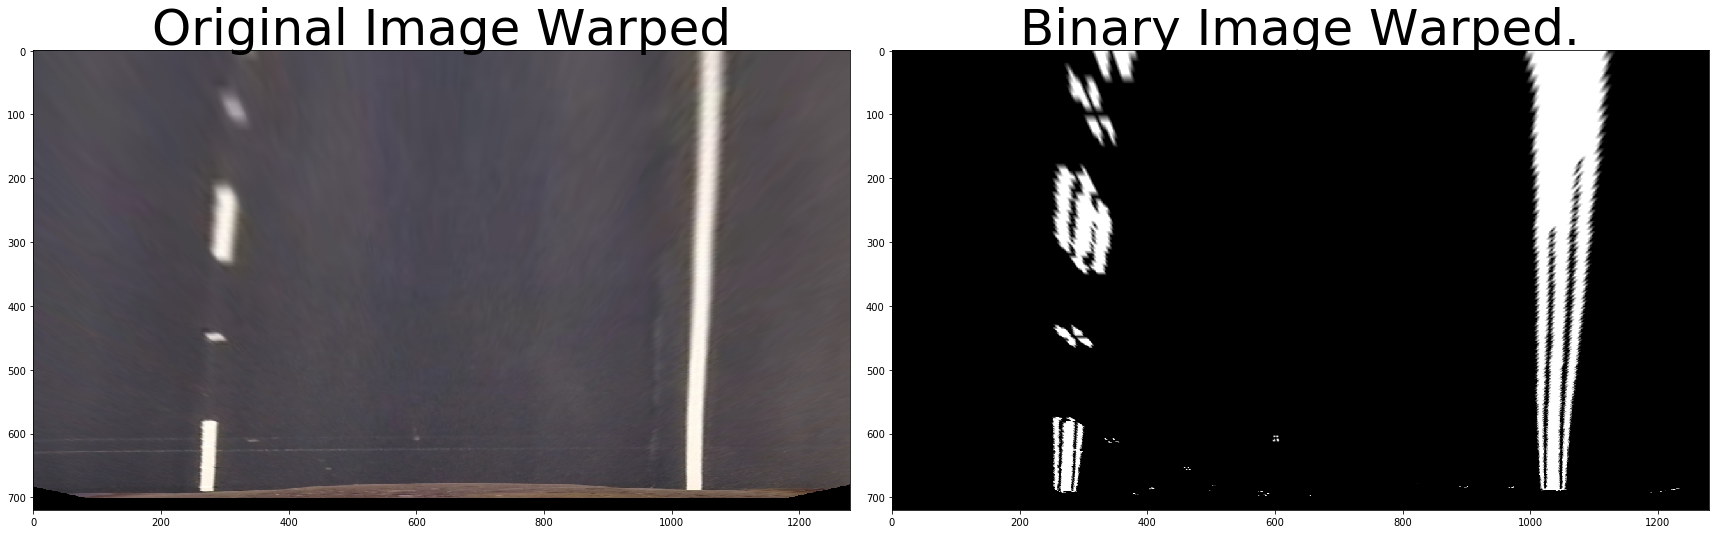

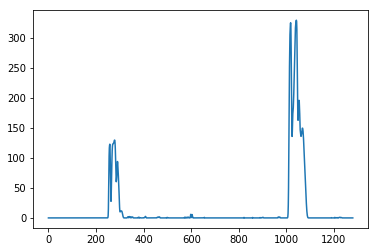

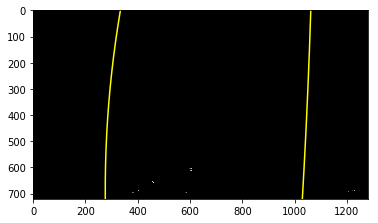

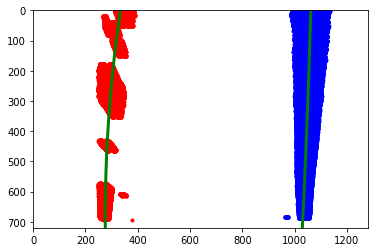

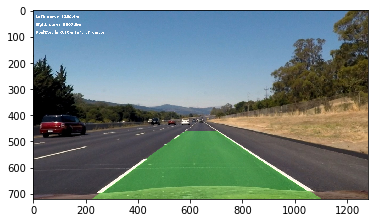

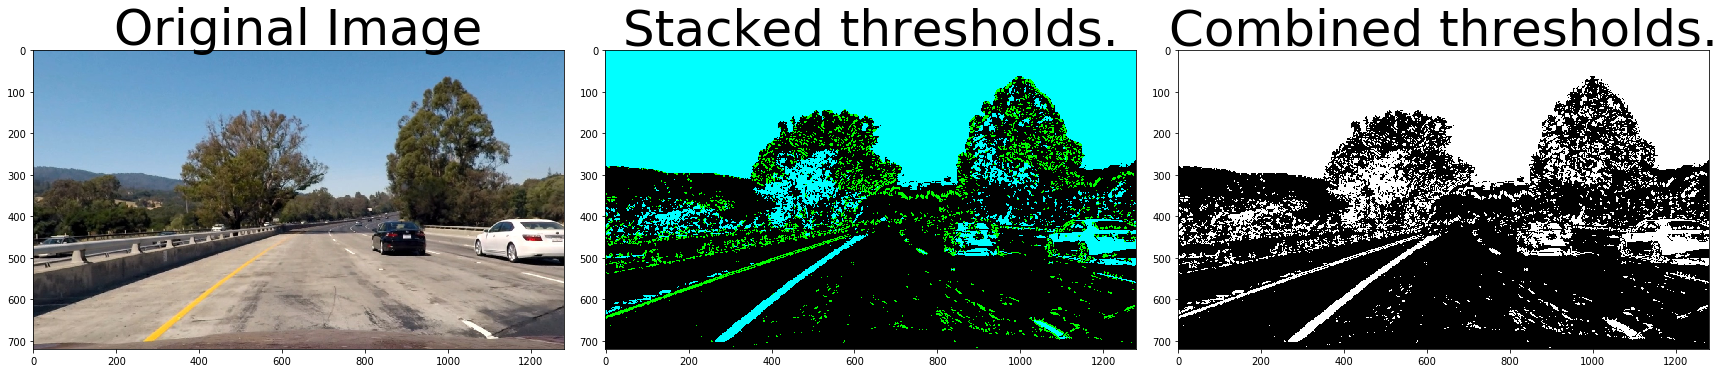

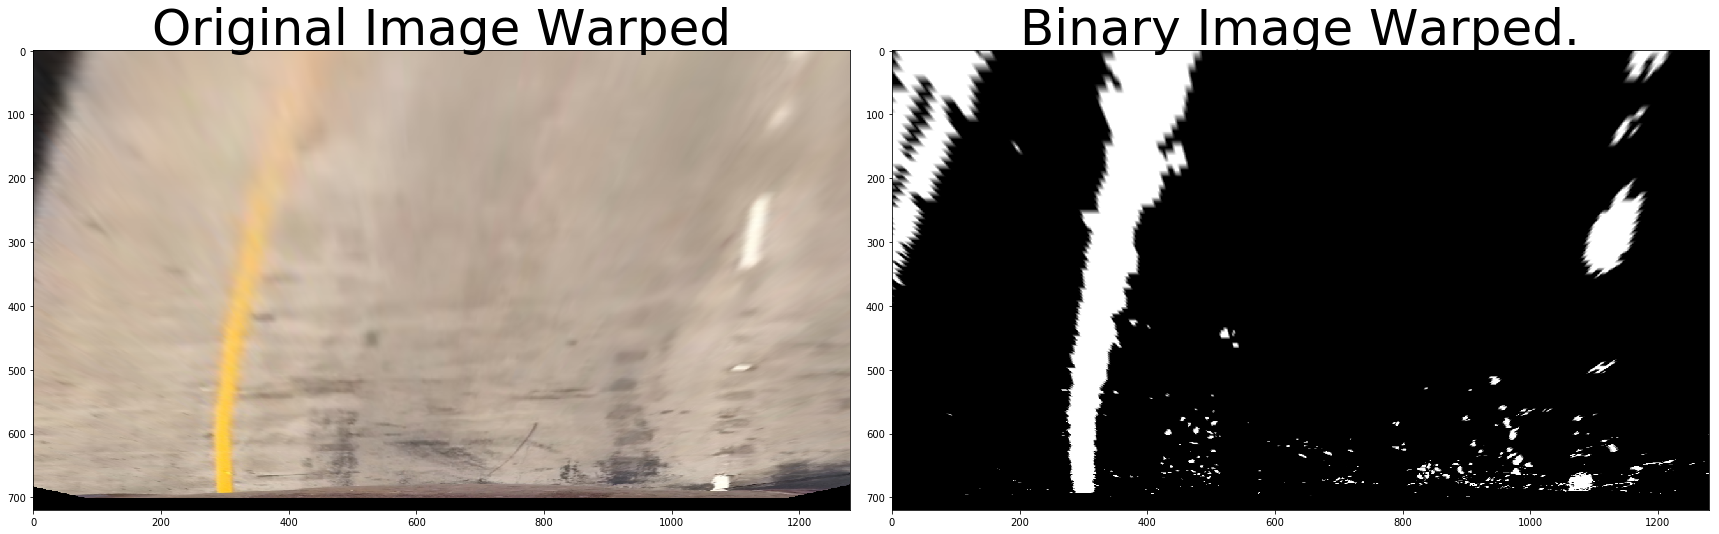

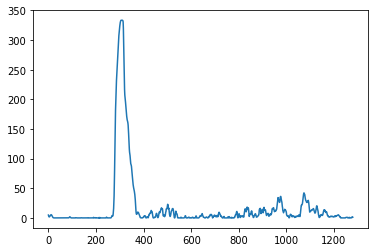

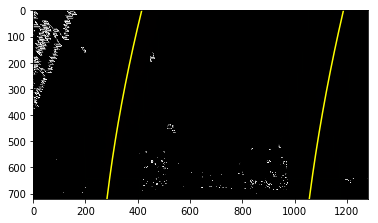

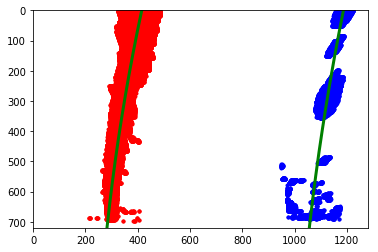

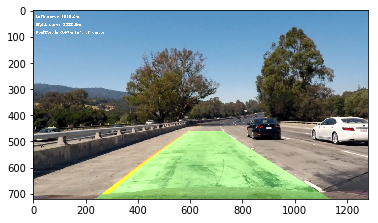

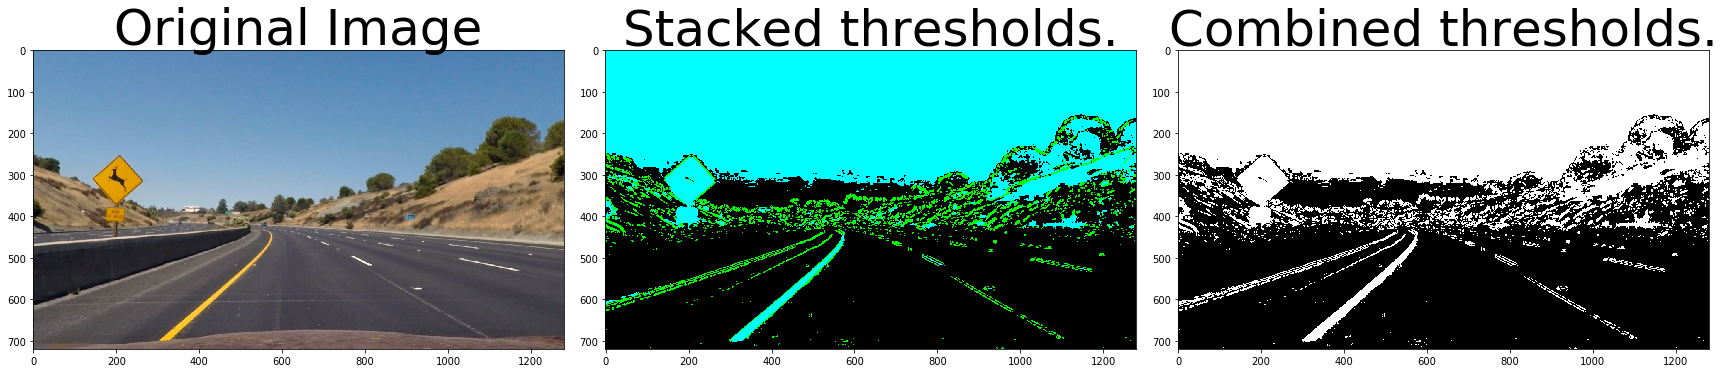

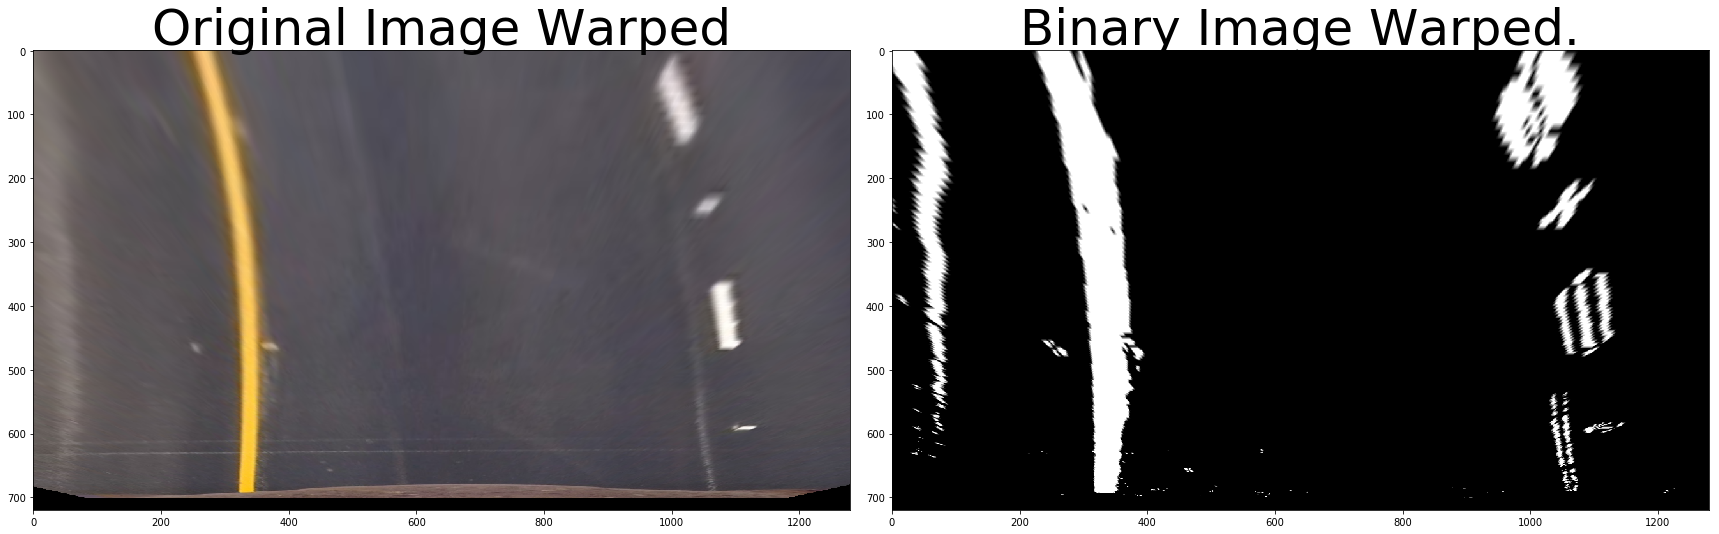

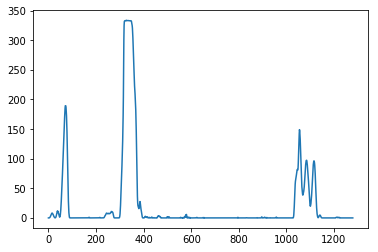

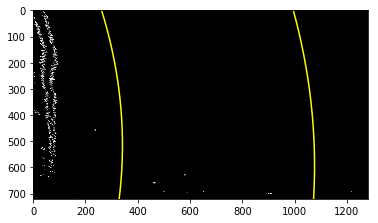

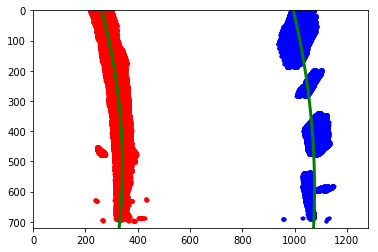

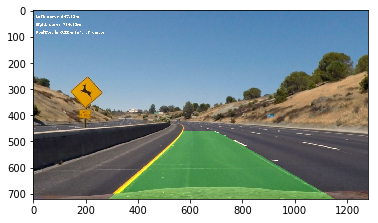

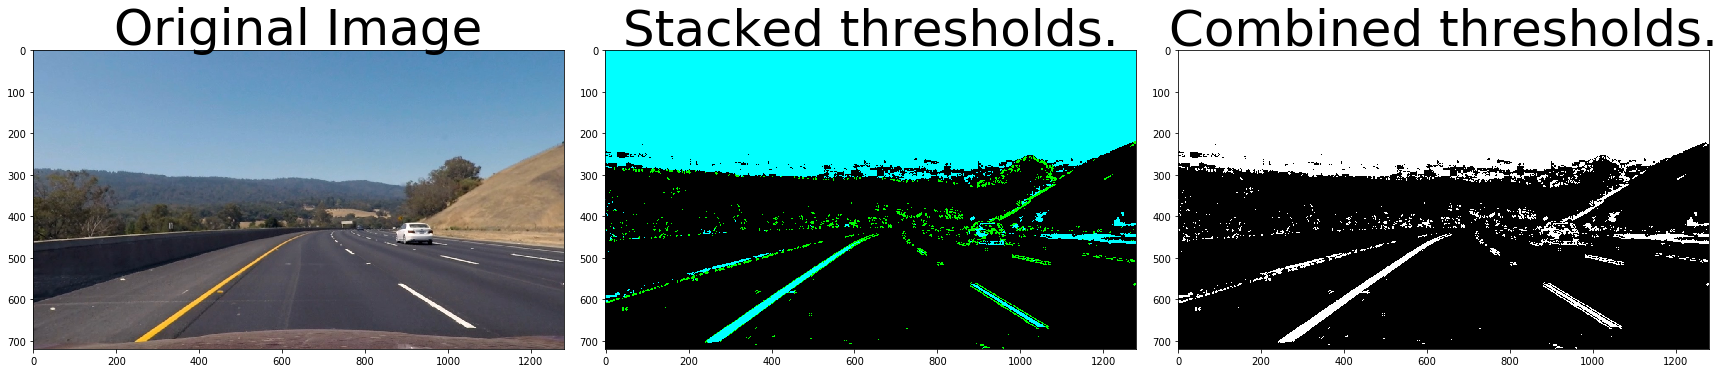

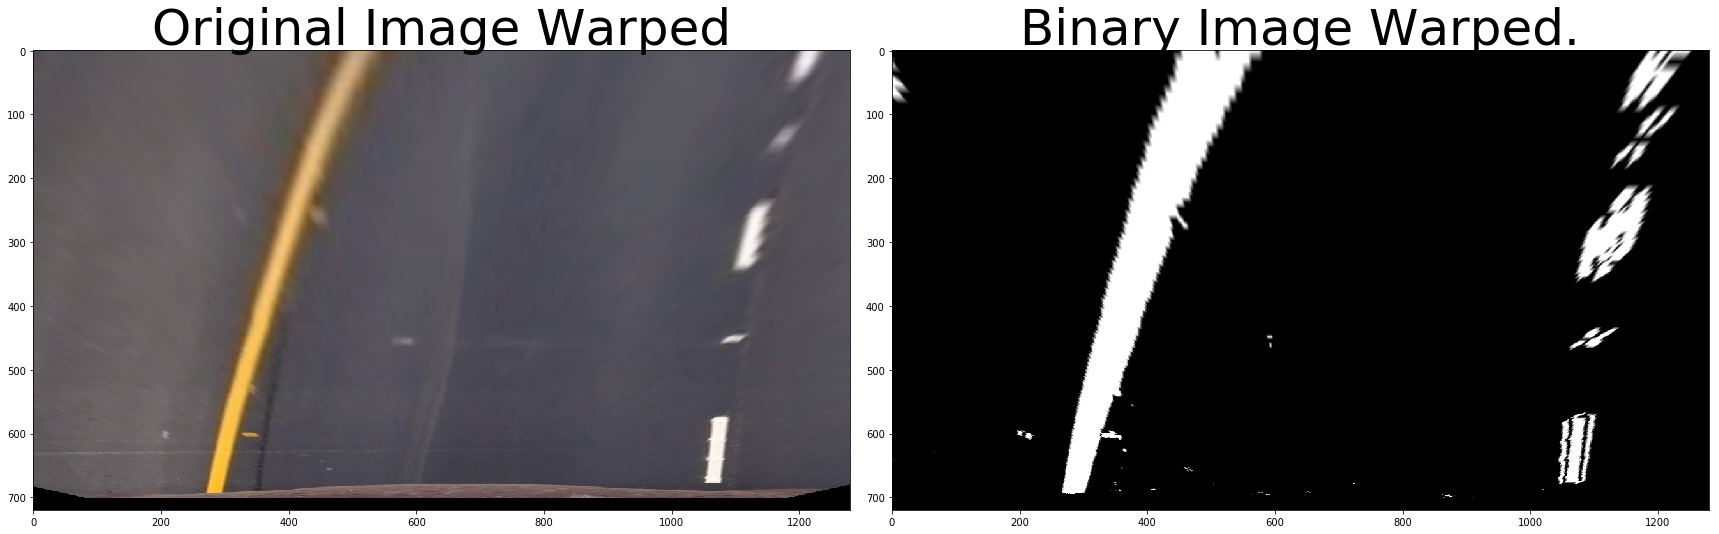

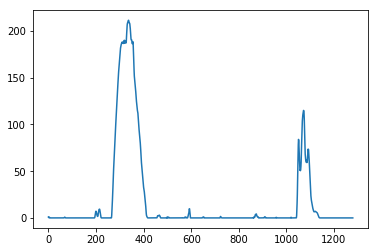

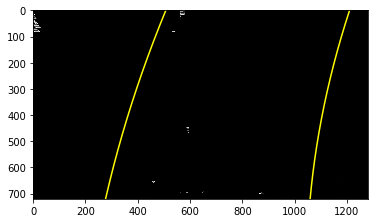

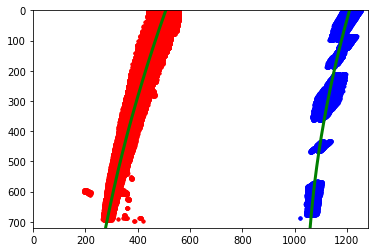

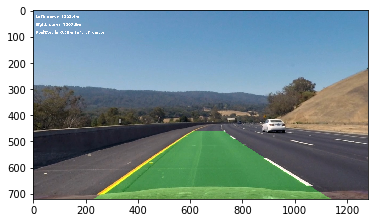

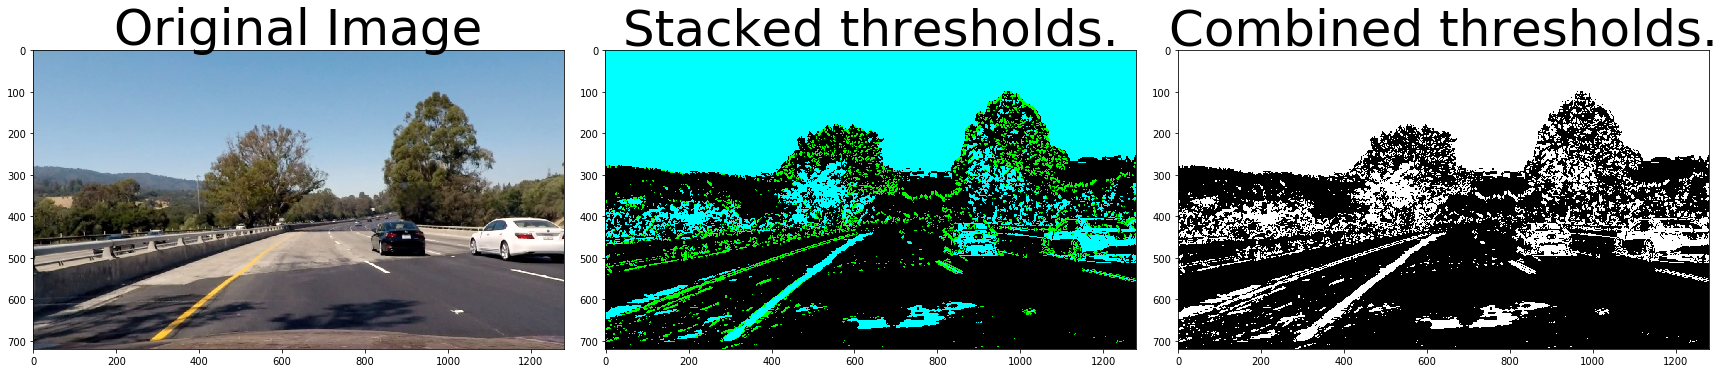

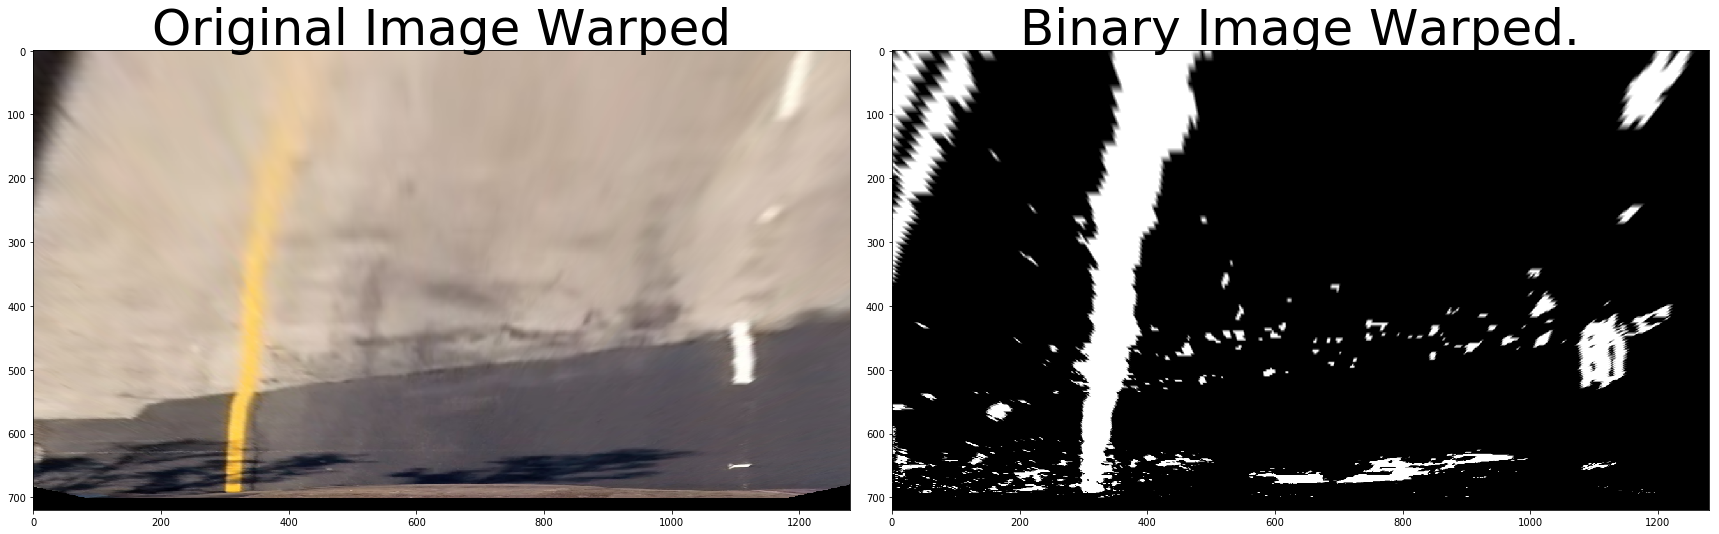

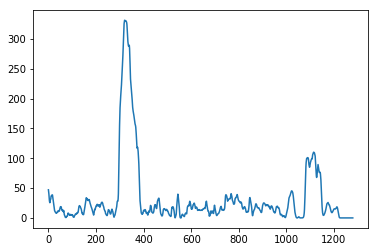

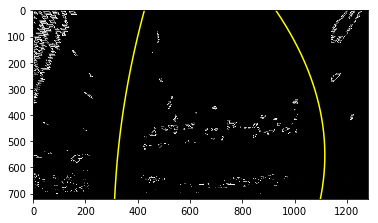

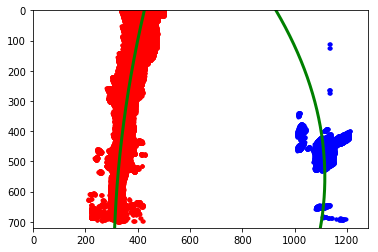

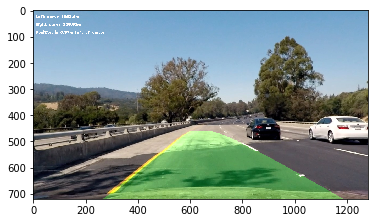

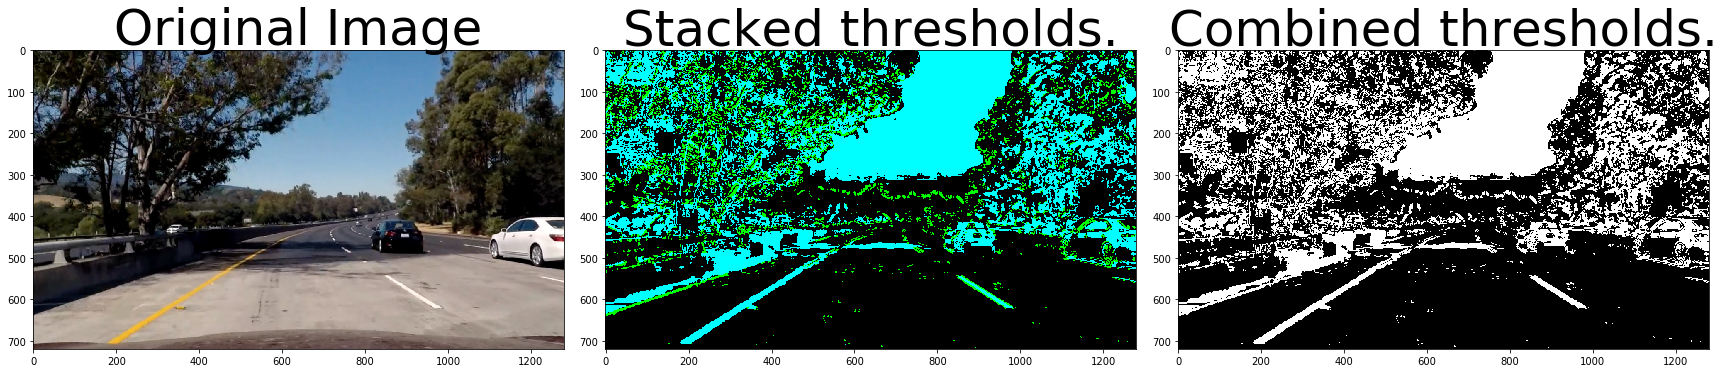

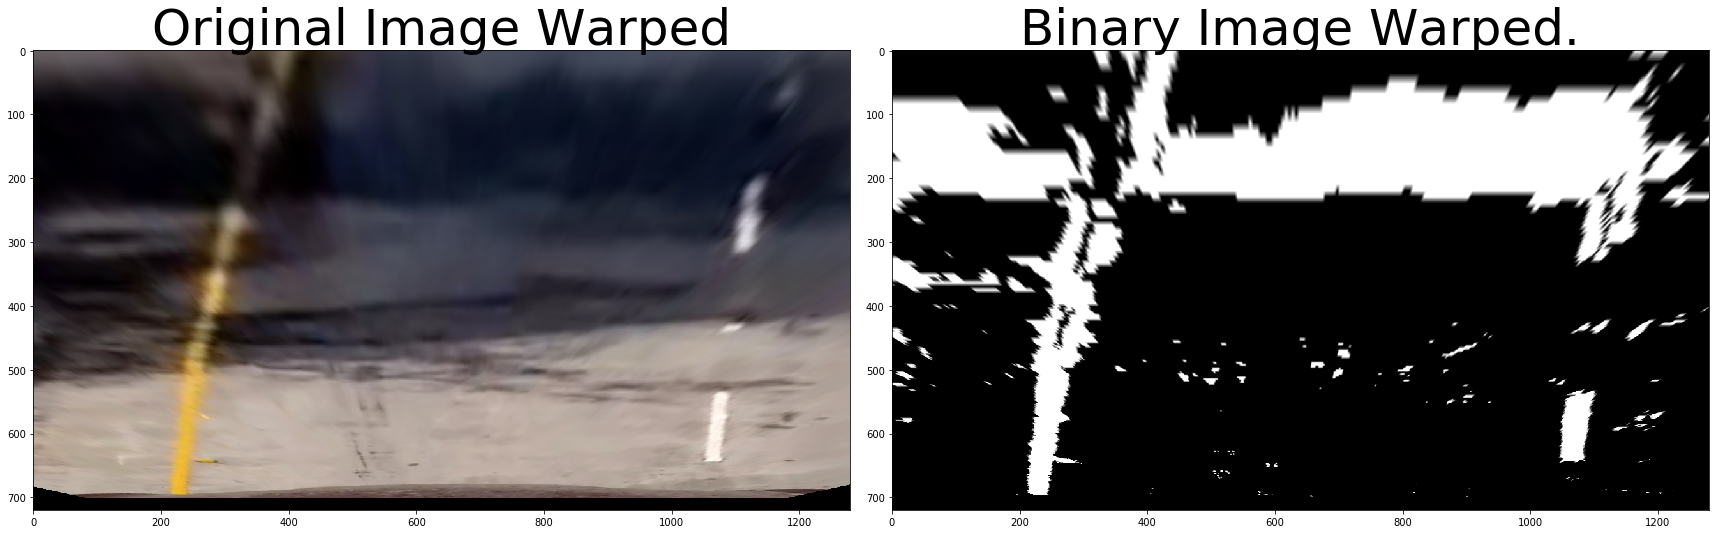

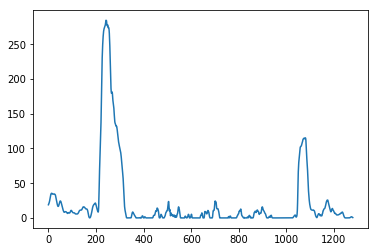

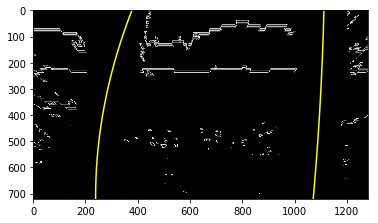

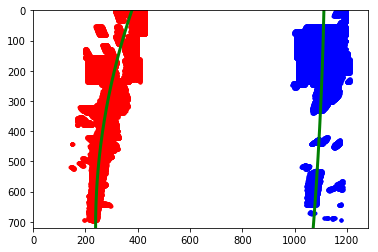

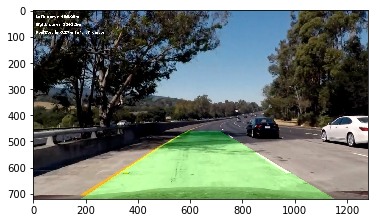

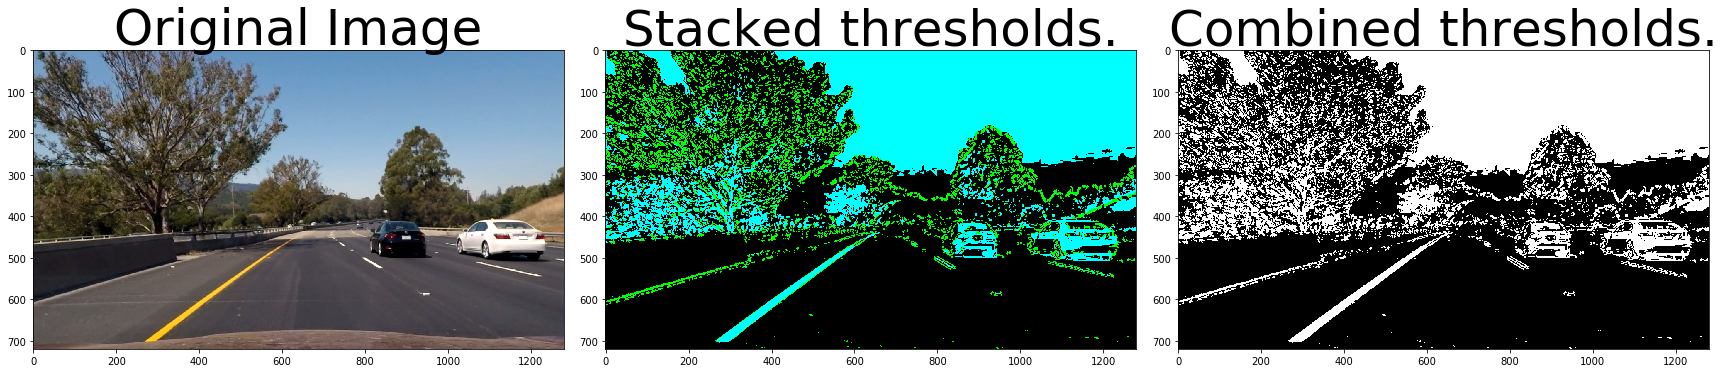

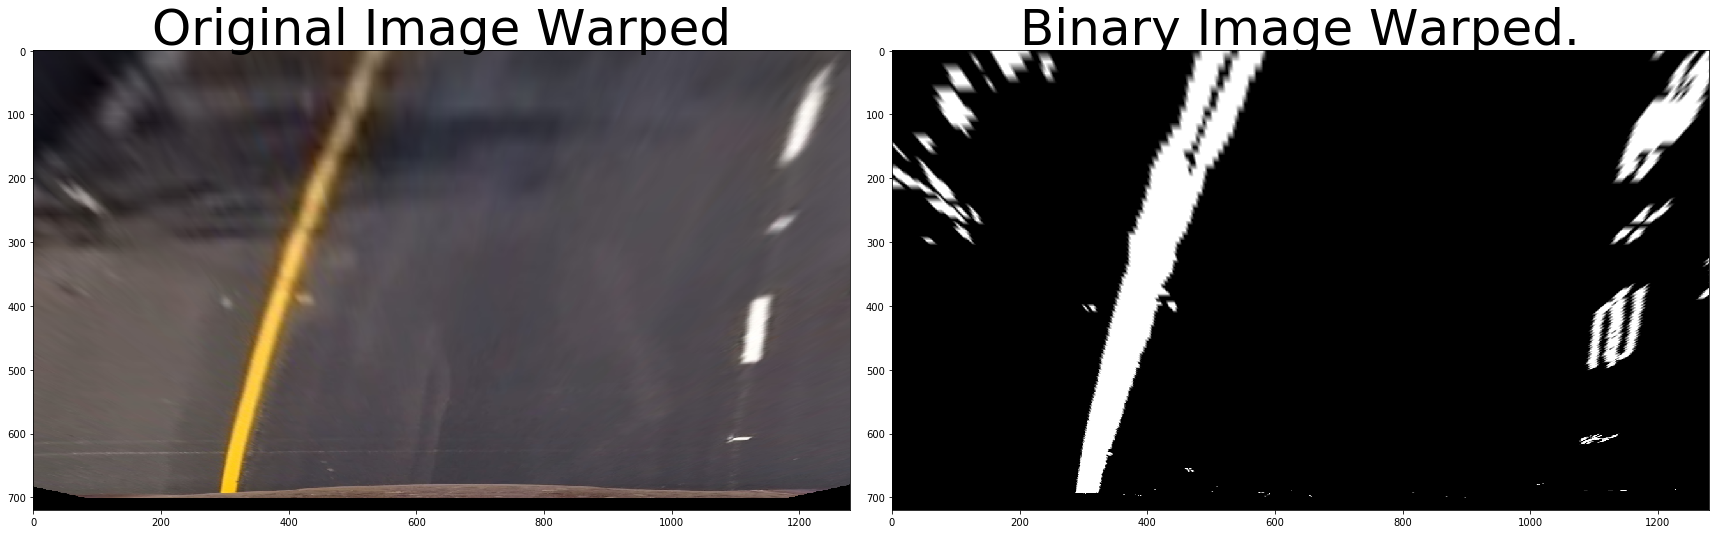

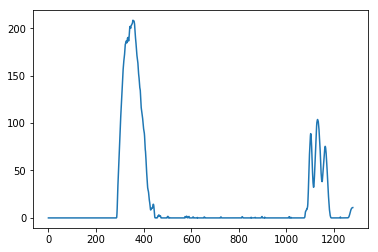

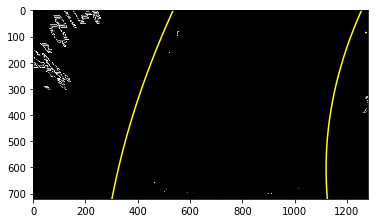

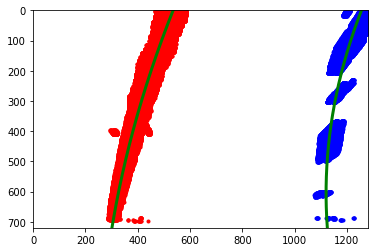

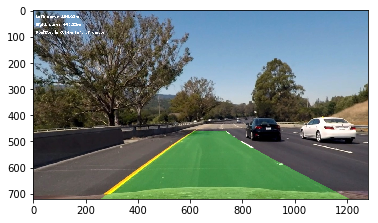

In [3]:
def process_image(img, display=False):
    img = camera.undistort(img)
    
    threshold = Threshold()
    combined_binary = threshold.get_threshold(img)
    threshold.display(img, display)
    
    perspective = Perspective()
    warped = perspective.warp_image(combined_binary, perspective.perspective_transform())
    perspective.display(img, warped, display)
    
    line = Line();
    line.detect_initial_lane_lines(warped, display)
    line.detect_subsequent_lane_lines(warped)
    line.measure_curvature(warped, display)
    newwarp = line.identify_lane_area(warped)
    
    return generate_output(img, line, newwarp)
    
    
def generate_output(img, line, newwarp):
    font = cv2.FONT_HERSHEY_PLAIN 
    cv2.putText(img,'Left curve' + ' ' + str(line.left_curverad)[:6] + 'm',(10,30), font, 1,(255,255,255),2)
    cv2.putText(img,'Right curve' + ' ' + str(line.right_curverad)[:6] + 'm',(10,60), font, 1,(255,255,255),2)
    distance_from_center = abs((640 - line.position)*3.7/700) 
    if line.position > 640:
        cv2.putText(img, 'Position is {:.2f}m left of center'.format(distance_from_center), (10,90), font, 1, color=(255,255,255), thickness = 2)
    else:
        cv2.putText(img, 'Position is {:.2f}m right of center'.format(distance_from_center), (10,90), font, 1, color=(255,255,255), thickness = 2)
    # Combine the result with the original image
    return cv2.addWeighted(img, 1, newwarp, 0.3, 0)

def process_test_images():
    images = glob.glob('test_images/*.jpg')
    for fname in images:
            img = mpimg.imread(fname)
            result = process_image(img, True)
            plt.figure()
            plt.imshow(result)

process_test_images()

In [5]:
output_file = 'output.mp4'
vclip = VideoFileClip("project_video.mp4")
out_clip = vclip.fl_image(process_image).subclip(t_start=0) #NOTE: this function expects color images!!
%time out_clip.write_videofile(output_file, audio=False)

HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output_file))


[MoviePy] >>>> Building video output.mp4
[MoviePy] Writing video output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [10:53<00:00,  2.14it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output.mp4 

Wall time: 10min 55s
